<a href="https://colab.research.google.com/github/Vaibhav212000/ML-and-Deep-Learning-Projects/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
loan = pd.read_csv("/content/drive/MyDrive/Ex_Files_Machine_Learning_with_Python_Decision_Trees/Exercise Files/02/loan.csv")
loan.head()

,Income,Loan Amount,Default
0,15,8,No
1,30,8,No
2,5,9,Yes
3,22,10,No
4,33,12,No


In [ ]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Income       30 non-null     int64 
 1   Loan Amount  30 non-null     int64 
 2   Default      30 non-null     object
dtypes: int64(2), object(1)
memory usage: 852.0+ bytes


In [ ]:
loan.describe()

,Income,Loan Amount
count,30.000000,30.000000
mean,18.766667,51.966667
std,8.572946,34.055212
min,5.000000,8.000000
25%,13.000000,21.250000
50%,18.000000,49.000000
75%,25.500000,79.500000
max,34.000000,110.000000


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

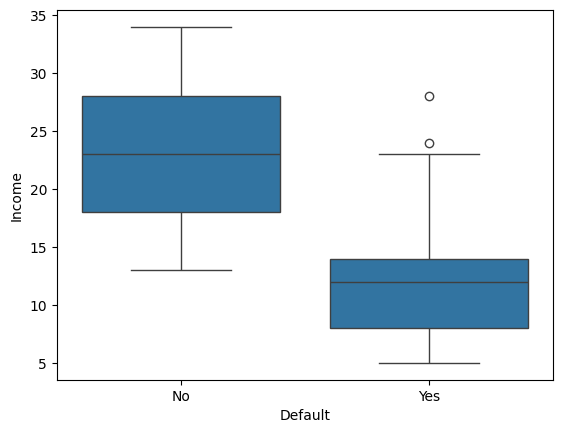

In [ ]:
ax = sns.boxplot(data = loan, x = "Default", y = "Income")

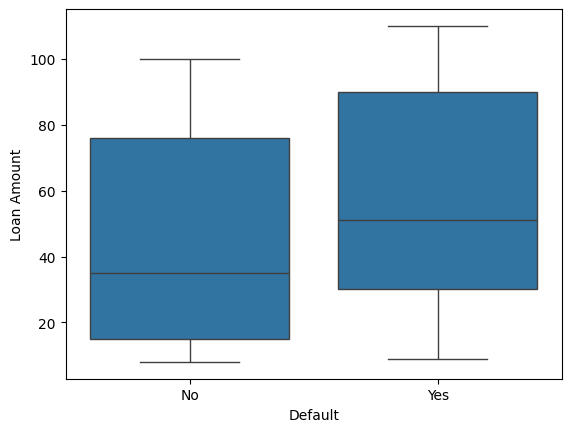

In [ ]:
ax =  sns.boxplot(data = loan , x = "Default", y = "Loan Amount")

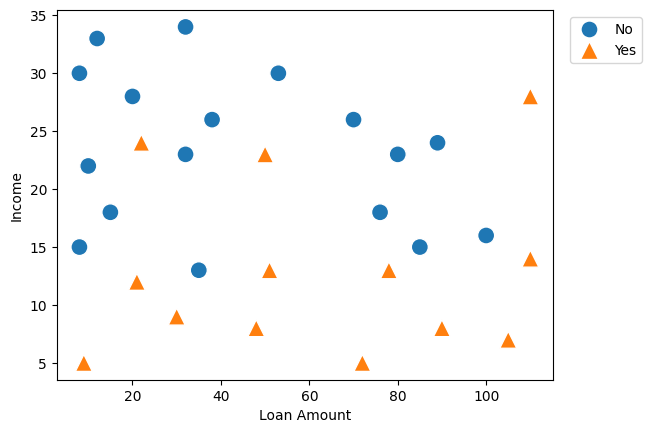

In [ ]:
ax = sns.scatterplot(data = loan, x = 'Loan Amount', y = 'Income', hue = 'Default', style = 'Default', markers = ['o','^'], s = 150)
ax = plt.legend(bbox_to_anchor = (1.02,1), loc = 'upper left')

# 3.Prepare the data

In [ ]:
y = loan[["Default"]]
x = loan[['Income', 'Loan Amount']]

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size= 0.8, stratify = y, random_state =1234)

In [ ]:
x_train.shape, x_test.shape

((24, 2), (6, 2))

# 4. Train And Evalute the classification Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [ ]:
model =  classifier.fit(x_train , y_train)

In [ ]:
model.score(x_test, y_test)

0.5

# 5. Visulization the classification Tree

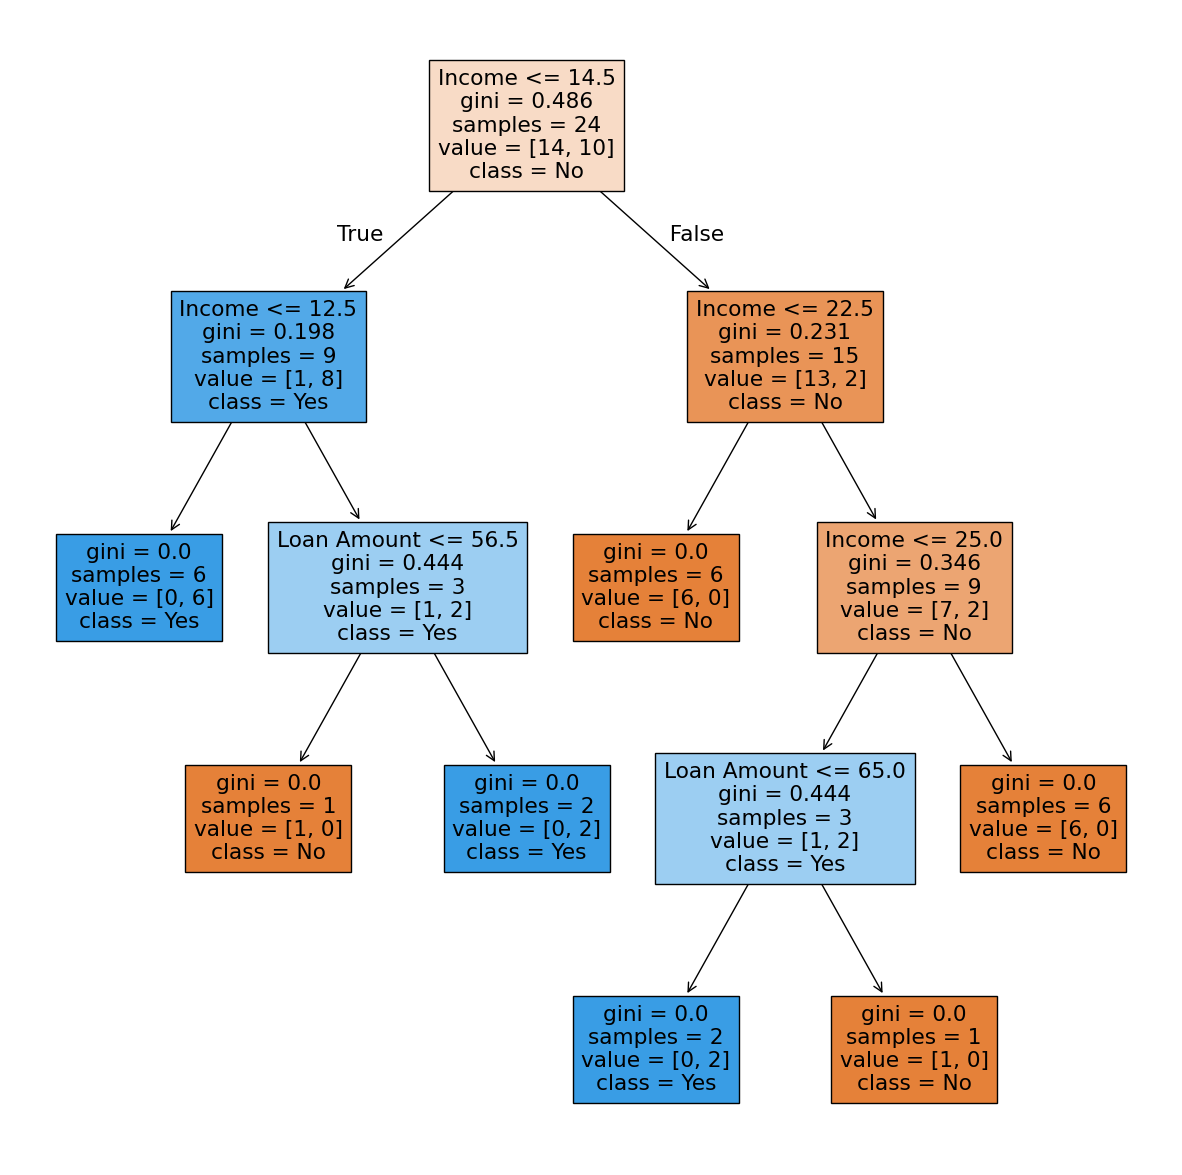

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names=list(x.columns),class_names=['No', 'Yes'],filled =True);

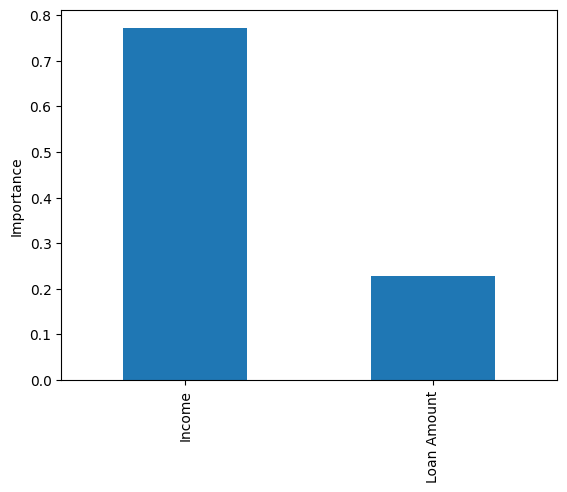

In [ ]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = x.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

# 6. Pruning Of Classification Tree

In [ ]:
model.score(x_train, y_train)

1.0

In [ ]:
model.score(x_test, y_test)

0.5

In [ ]:
grid = {'max_depth' : [2,3,4,5],
        'min_samples_split' : [2,3,4],
        'min_samples_leaf' : [1,2,3,4,5,6]}

In [ ]:
from sklearn.model_selection import GridSearchCV
classifer = DecisionTreeClassifier(random_state = 1234 )
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(x_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6],
                         'min_samples_split': [2, 3, 4]})

In [ ]:
model_ = gcv.best_estimator_
model.fit(x_train, y_train)

DecisionTreeClassifier(random_state=1234)

In [ ]:
model_.score(x_train, y_train)

0.875

In [ ]:
model_.score(x_test, y_test)

0.8333333333333334

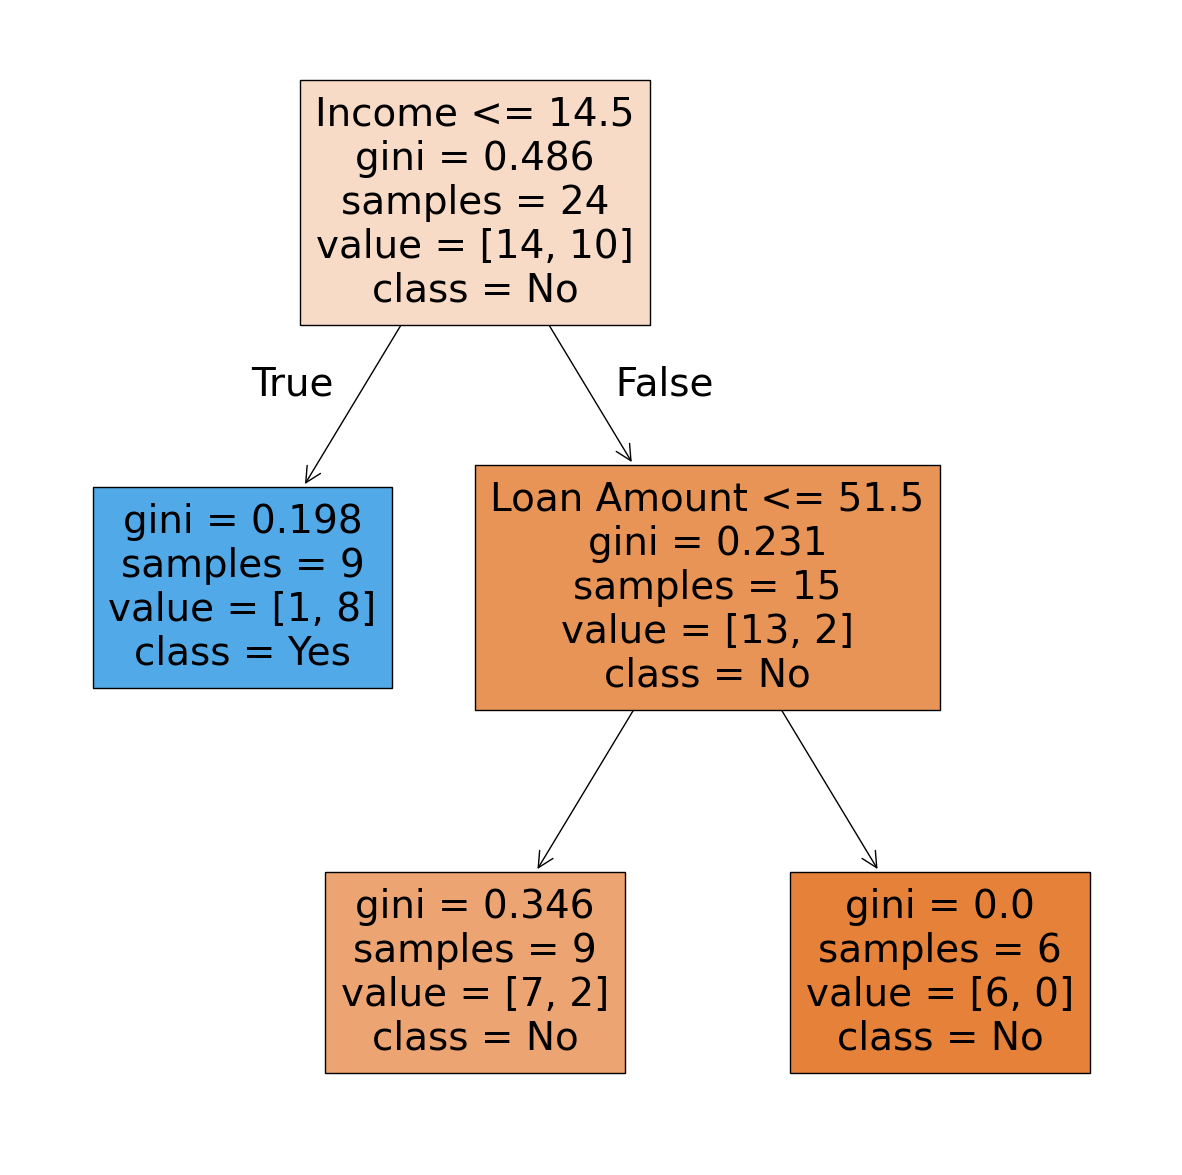

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(model_,feature_names= list(x.columns), class_names = ['No', 'Yes'], filled = True);

# Regression Tree Python


# 1. Collect Data

In [ ]:
import pandas as pd
income = pd.read_csv("/content/drive/MyDrive/Ex_Files_Machine_Learning_with_Python_Decision_Trees/Exercise Files/03/income.csv")
income.head()

,Age,Education,Salary
0,25,Bachelors,43.9
1,30,Bachelors,54.4
2,45,Bachelors,62.5
3,55,Bachelors,72.5
4,65,Bachelors,74.6


In [ ]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Age        30 non-null     int64  
 1   Education  30 non-null     object 
 2   Salary     30 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 852.0+ bytes


In [ ]:
income.describe()

,Age,Salary
count,30.000000,30.000000
mean,43.366667,64.406667
std,14.375466,26.202684
min,24.000000,16.800000
25%,30.500000,46.350000
50%,45.000000,62.100000
75%,55.000000,76.800000
max,65.000000,118.000000


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns

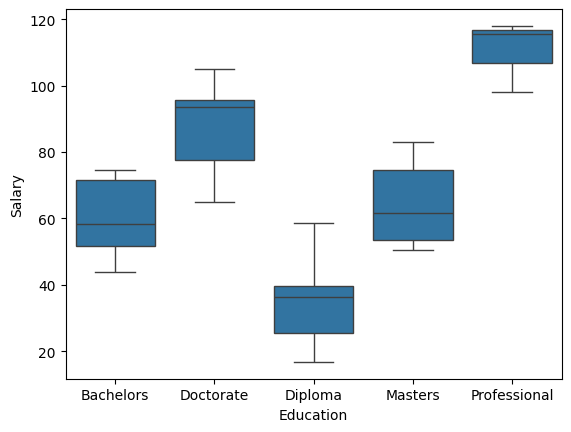

In [ ]:
ax = sns.boxplot(data = income, x ='Education', y = 'Salary')

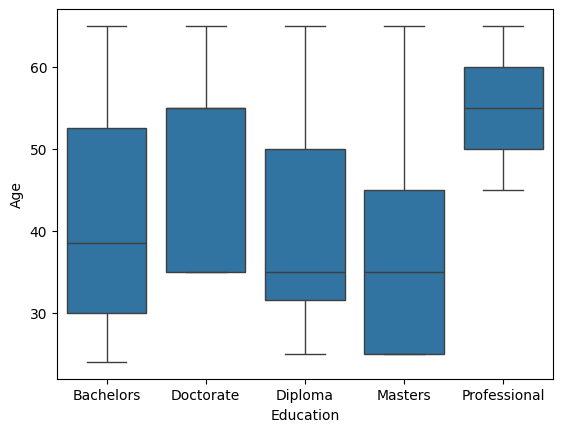

In [ ]:
ax = sns.boxplot(data = income , x='Education', y='Age')

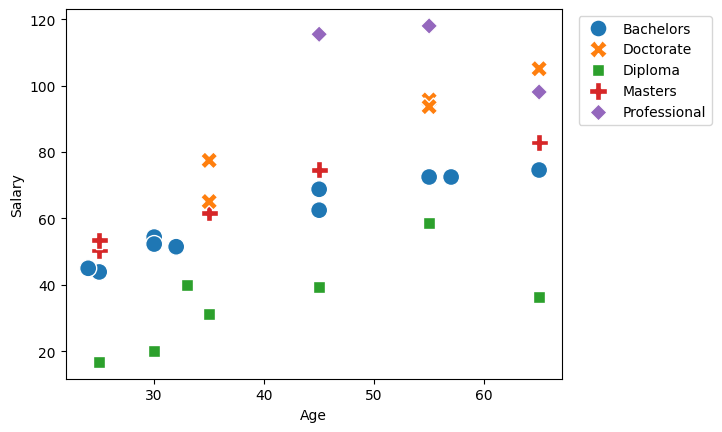

In [ ]:
ax = sns.scatterplot(data = income, x ='Age', y = 'Salary', hue = 'Education', style = 'Education', s = 150)
ax = plt.legend(bbox_to_anchor = (1.02,1), loc ="upper left")

# 2. Prerpare the Data

In [ ]:
Y = income[['Salary']]

In [ ]:
X =  income[['Age', 'Education']]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6, stratify=X['Education'], random_state=1234)

In [ ]:
X_train.shape, X_test.shape

((18, 2), (12, 2))

In [ ]:
X_train = pd.get_dummies(X_train)
X_train.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
0,25,True,False,False,False,False
16,45,False,False,False,True,False
17,65,False,False,False,True,False
29,65,False,False,False,False,True
8,25,False,True,False,False,False


In [ ]:
X_test = pd.get_dummies(X_test)
X_test.head()

,Age,Education_Bachelors,Education_Diploma,Education_Doctorate,Education_Masters,Education_Professional
9,30,False,True,False,False,False
21,25,False,False,False,True,False
4,65,True,False,False,False,False
10,35,False,True,False,False,False
7,65,False,False,True,False,False


# Training And Evaluation

In [ ]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=1234)

In [ ]:
model = regressor.fit(X_train, Y_train)

In [ ]:
model.score(X_test, Y_test)

0.5853149222529794

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(Y_test, Y_test_pred)

13.541666666666666

# Visulization Regression Tree

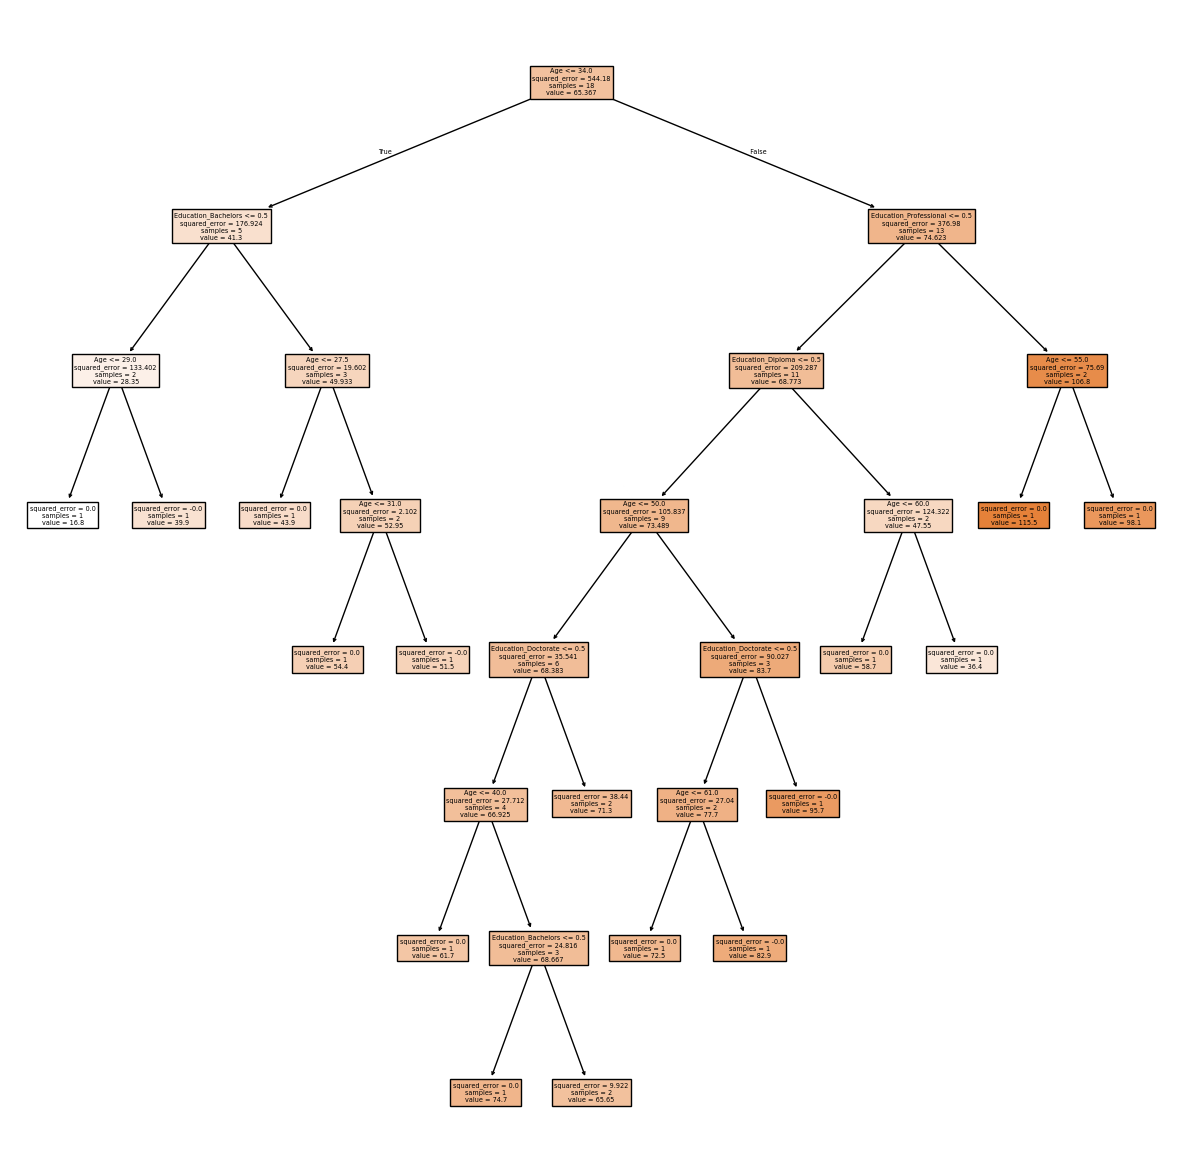

In [ ]:
 from sklearn import tree
 plt.figure(figsize=(15,15))
 tree.plot_tree(model,feature_names = list(X_train.columns),filled=True);

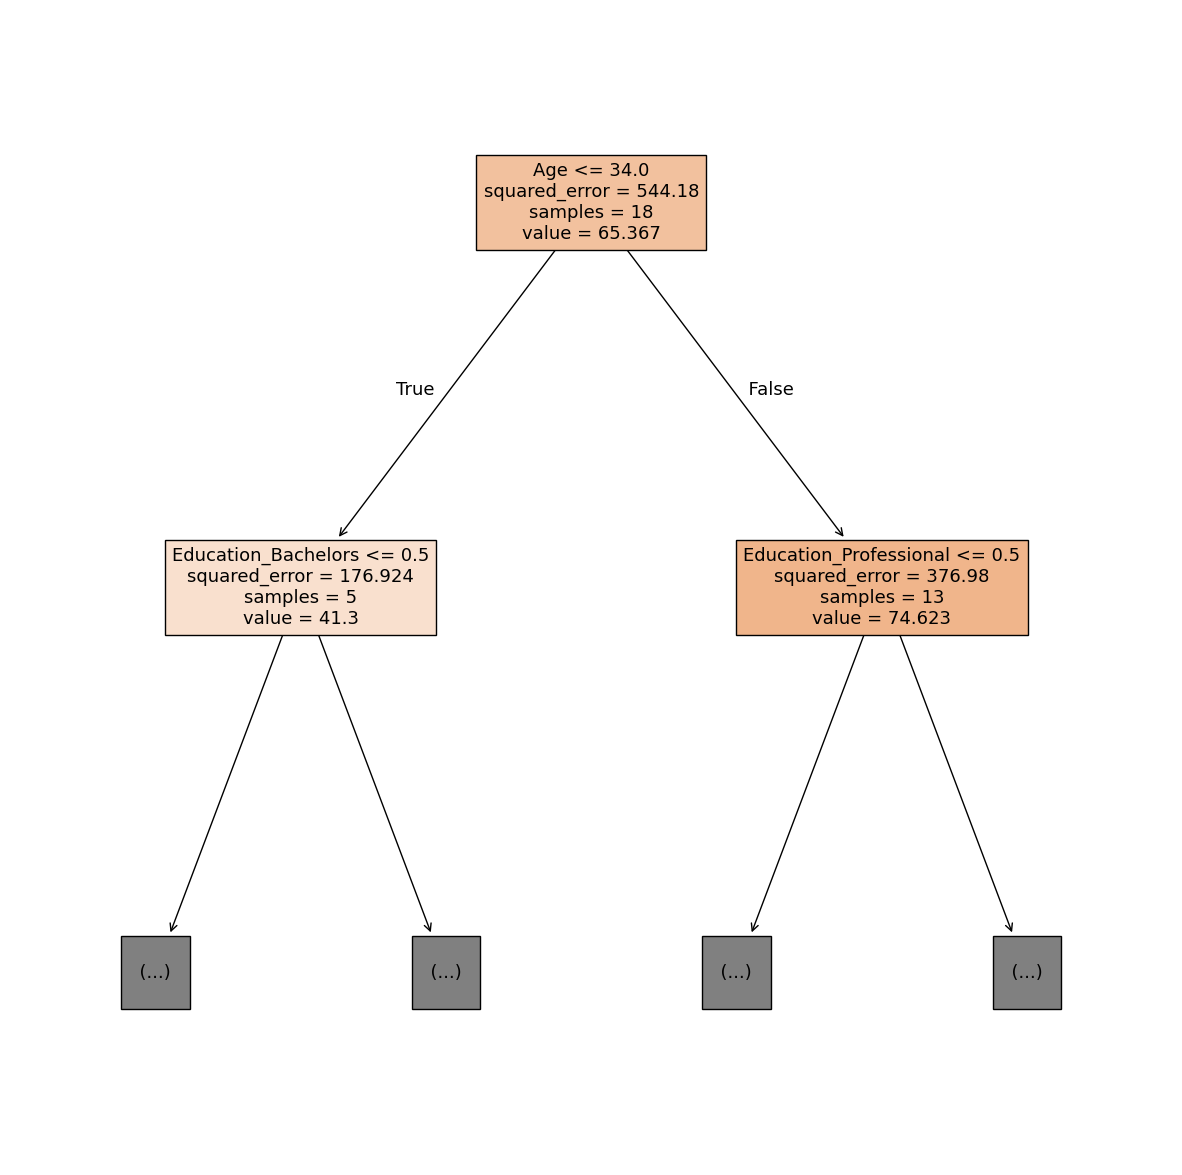

In [ ]:
 from sklearn import tree
 plt.figure(figsize=(15,15))
 tree.plot_tree(model,feature_names = list(X_train.columns),filled=True,max_depth=1);

In [ ]:
importance = model.feature_importances_
importance

array([0.54597998, 0.06326845, 0.11352129, 0.02490287, 0.        ,
       0.25232742])

In [ ]:
feature_importances = pd.Series (importance , index= X_train.columns)

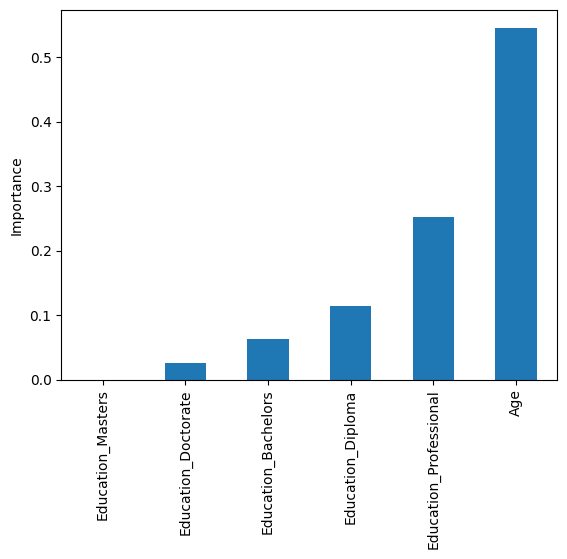

In [ ]:
feature_importances.sort_values().plot(kind = 'bar')
plt.ylabel('Importance');

# 6. Prune the Regression Tree

In [ ]:
model.score(X_train, Y_train)

0.9901253057607573

In [ ]:
model.score(X_test, Y_test)

0.5853149222529794

In [ ]:
path = regressor.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas = path.ccp_alphas
list(ccp_alphas)

[np.float64(0.0),
 np.float64(0.23361111111110705),
 np.float64(2.1578395061724223),
 np.float64(3.004444444444693),
 np.float64(3.0334259259259144),
 np.float64(8.409999999999753),
 np.float64(12.000000000000506),
 np.float64(13.813611111110644),
 np.float64(14.822500000000016),
 np.float64(26.06669753086468),
 np.float64(31.05601851851865),
 np.float64(61.1659960718292),
 np.float64(135.95562548562512),
 np.float64(222.77094017094078)]

In [ ]:
ccp_alphas = ccp_alphas[:-1]
list(ccp_alphas)

[np.float64(0.0),
 np.float64(0.23361111111110705),
 np.float64(2.1578395061724223),
 np.float64(3.004444444444693),
 np.float64(3.0334259259259144),
 np.float64(8.409999999999753),
 np.float64(12.000000000000506),
 np.float64(13.813611111110644),
 np.float64(14.822500000000016),
 np.float64(26.06669753086468),
 np.float64(31.05601851851865),
 np.float64(61.1659960718292),
 np.float64(135.95562548562512)]

In [ ]:
train_scores = []
test_scores = []
for alphas in ccp_alphas:
  regressor = DecisionTreeRegressor(random_state=1234, ccp_alpha=alphas)
  model = regressor.fit(X_train, Y_train)
  train_scores.append(model.score(X_train, Y_train))
  test_scores.append(model.score(X_test, Y_test))

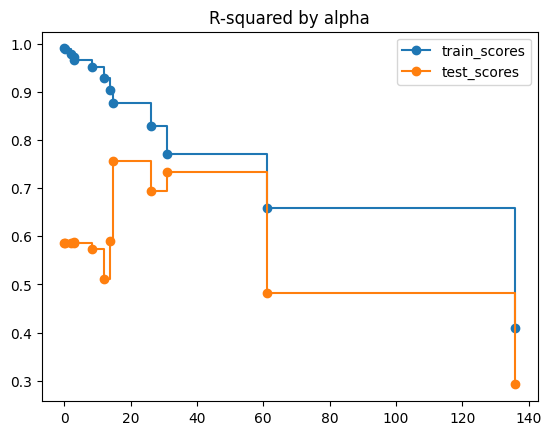

In [ ]:
plt.plot(ccp_alphas, train_scores, marker = 'o', label = 'train_scores', drawstyle = 'steps-post')
plt.plot(ccp_alphas, test_scores, marker = 'o', label = 'test_scores', drawstyle = 'steps-post')
plt.legend()
plt.title('R-squared by alpha');

In [ ]:
test_scores

[0.5853149222529794,
 0.5857107382012932,
 0.5857107382012932,
 0.5889110156116097,
 0.5861012049128272,
 0.5742699063850475,
 0.5110187660049715,
 0.5901546580161237,
 0.7572572323335666,
 0.6933555316243081,
 0.7328980549684876,
 0.4823659659054369,
 0.2920328593359385]

In [ ]:
ix = test_scores.index(max(test_scores))
best_alpha = ccp_alphas[ix]
best_alpha

np.float64(14.822500000000016)

In [ ]:
regressor = DecisionTreeRegressor(random_state=1234, ccp_alpha=best_alpha)
model = regressor.fit(X_train, Y_train)

In [ ]:
model_score = model.score(X_test, Y_test)
model_score

0.7572572323335666

In [ ]:
model_scores = model.score(X_train, Y_train)
model_scores

0.8765762758237674

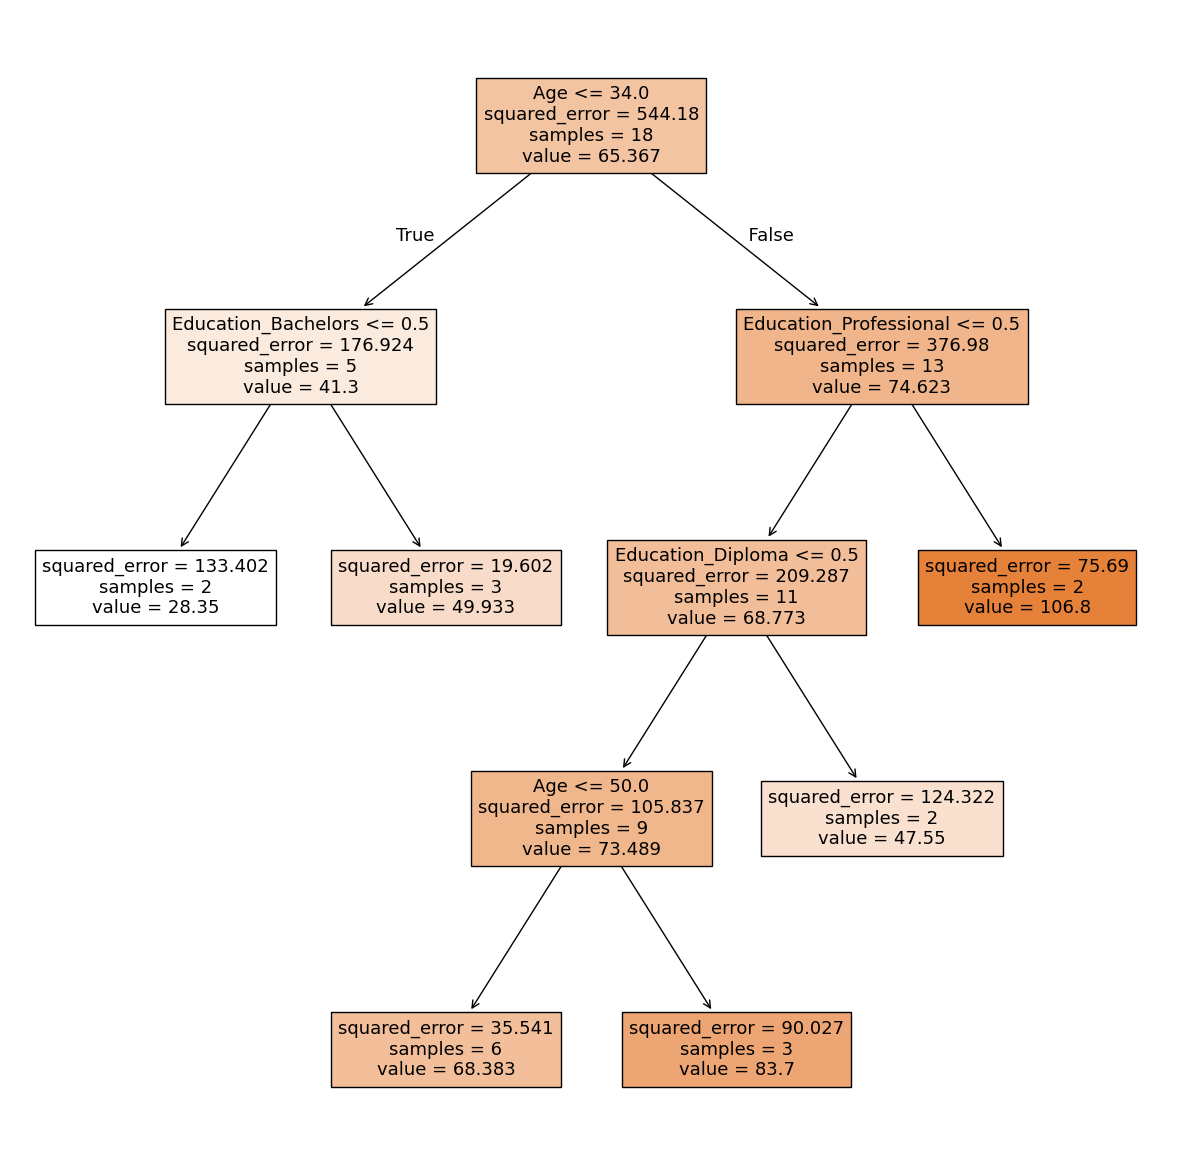

In [ ]:
plt.figure(figsize=(15,15))
tree.plot_tree(model,feature_names = list(X_train.columns),filled=True);